<h1>DATA VISUALIZATION LAB<h1>
<h1>Edge Detection Overview</h1>
<p>Edge detection is a technique used in image processing.</p>

<h2>Sobel Operator</h2>
<p>The Sobel operator calculates the gradient of the image intensity.</p>

<h3>Applications</h3>
<p>It is commonly used for detecting edges in images.</p>       

<p>Edge convolution enhances edge features for better detection.</p>
<p>Combined with other techniques, it improves image analysis.</p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sobel_edge_detection(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply Sobel operator
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    
    # Calculate the magnitude of the gradient
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))

    return sobel_magnitude


In [3]:
# Load images
images = [cv2.imread('insect.jpg'), cv2.imread('butterfly.jpg'), cv2.imread('bird.jpg')]
edges = [sobel_edge_detection(img) for img in images]


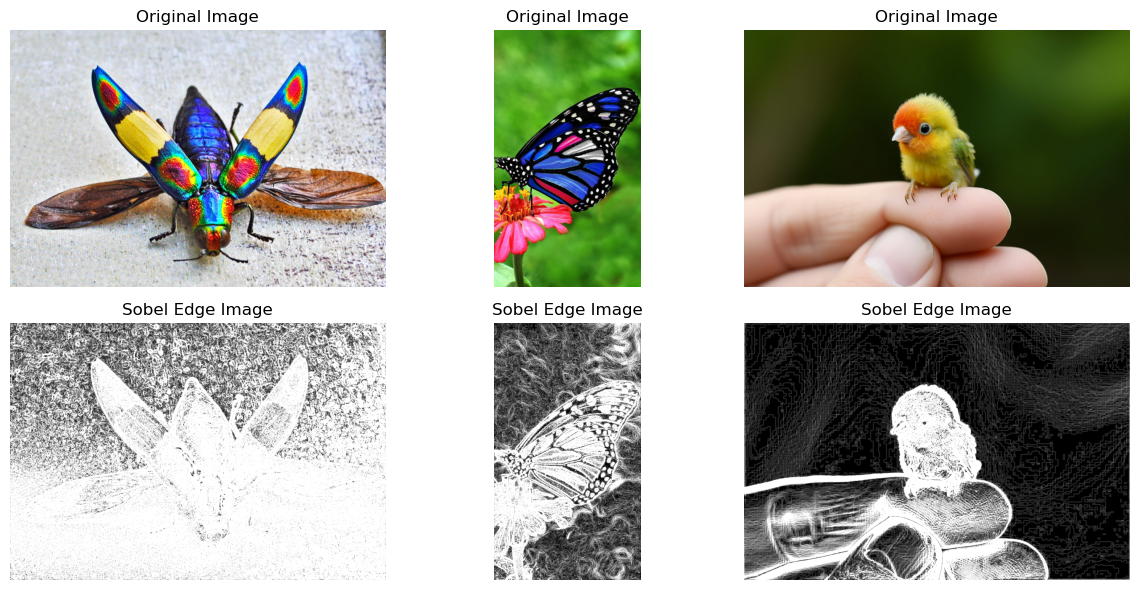

In [4]:
def display_images(original, edges):
    plt.figure(figsize=(12, 6))
    for i, (orig, edge) in enumerate(zip(original, edges)):
        plt.subplot(2, len(original), i + 1)
        plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(2, len(original), i + 1 + len(original))
        plt.imshow(edge, cmap='gray')
        plt.title('Sobel Edge Image')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_images(images, edges)


<h1>Gaussian Blurring and Grayscale Conversion</h1>
<p>Gaussian blurring is a technique used to reduce noise and detail in an image.</p>

<h2>Gaussian Blur</h2>
<p>This method applies a Gaussian function to smooth the image.</p>

<h3>Applications</h3>
<p>Gaussian blur is commonly used in preprocessing images for edge detection.</p>

<p>It helps in reducing high-frequency noise and preserving low-frequency structures.</p>
<p>Grayscale conversion simplifies the image data, reducing it to a single channel.</p>

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)


In [7]:
# Load images (replace with your actual file paths)
image_paths = ['insect.jpg', 'butterfly.jpg', 'bird.jpg']
images = [cv2.imread(img_path) for img_path in image_paths]

# Prepare lists to hold the processed images
gray_images = []
blurred_images = []

for img in images:
    gray_img = convert_to_gray(img)
    blurred_img = apply_gaussian_blur(gray_img)
    
    gray_images.append(gray_img)
    blurred_images.append(blurred_img)


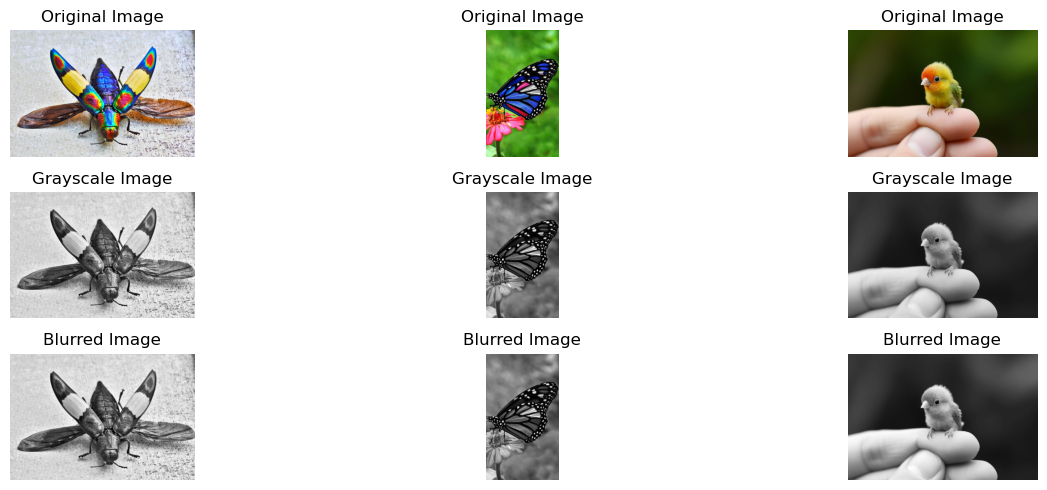

In [8]:
def display_images(original, gray, blurred):
    plt.figure(figsize=(15, 5))
    for i in range(len(original)):
        # Original image
        plt.subplot(3, len(original), i + 1)
        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Grayscale image
        plt.subplot(3, len(original), len(original) + i + 1)
        plt.imshow(gray[i], cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')
        
        # Blurred image
        plt.subplot(3, len(original), 2 * len(original) + i + 1)
        plt.imshow(blurred[i], cmap='gray')
        plt.title('Blurred Image')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images
display_images(images, gray_images, blurred_images)


<h1>Text Analysis with Gabor Filter</h1>
<p>The Gabor filter is a powerful tool for texture analysis in images.</p>

<h2>Gabor Filter Overview</h2>
<p>This filter combines Gaussian smoothing with a sinusoidal wave to extract features.</p>

<h3>Applications</h3>
<p>Gabor filters are commonly used in text analysis for feature extraction.</p>

<p>They are effective in capturing spatial frequency information and orientation.</p>
<p>Text recognition systems often use Gabor filters to enhance character features.</p>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def gabor_filter(image, ksize=21, sigma=5.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    # Create Gabor filter kernel
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    
    # Apply the Gabor filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    
    return filtered_image


In [11]:
# Load images (replace with your actual file paths)
image_paths = ['insect.jpg', 'butterfly.jpg', 'bird.jpg']
images = [cv2.imread(img_path) for img_path in image_paths]

# Prepare a list to hold the filtered images
gabor_images = []

for img in images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    filtered_img = gabor_filter(gray_img)  # Apply Gabor filter
    gabor_images.append(filtered_img)


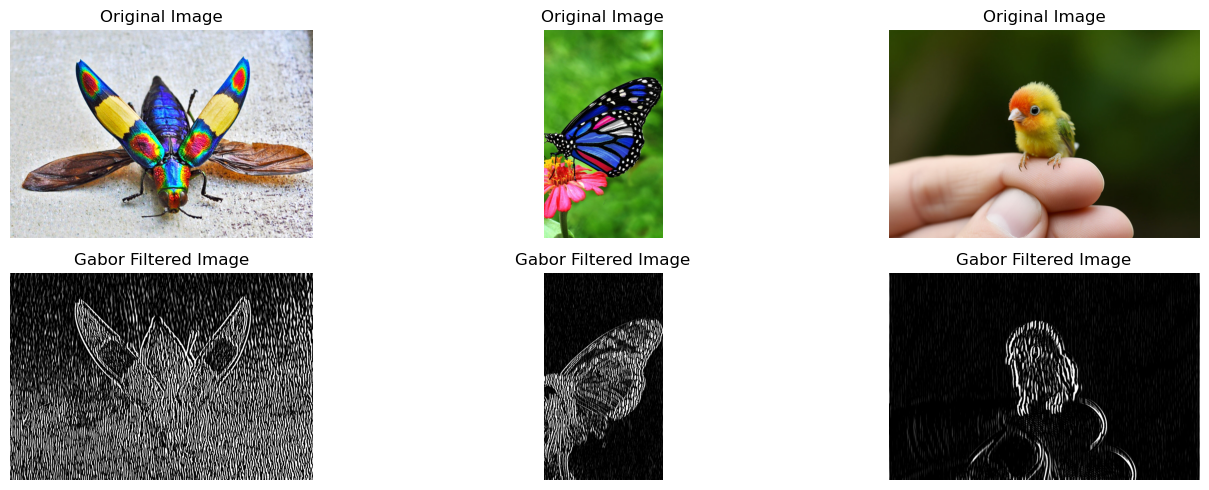

In [12]:
def display_images(original, filtered):
    plt.figure(figsize=(15, 5))
    for i in range(len(original)):
        # Original image
        plt.subplot(2, len(original), i + 1)
        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Gabor filtered image
        plt.subplot(2, len(original), len(original) + i + 1)
        plt.imshow(filtered[i], cmap='gray')
        plt.title('Gabor Filtered Image')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images
display_images(images, gabor_images)


<h1>Laplacian Edge Detection</h1>
<p>Laplacian edge detection is a technique used to identify regions of rapid intensity change in images.</p>

<h2>Laplacian Operator Overview</h2>
<p>This operator calculates the second derivative of the image intensity.</p>

<h3>Applications</h3>
<p>Laplacian edge detection is widely used in image processing for detecting edges.</p>

<p>It is particularly effective in highlighting areas with strong transitions.</p>
<p>This method is often combined with other edge detection techniques for better results.</p>

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def laplacian_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Laplacian operator
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    
    # Convert back to uint8
    laplacian = cv2.convertScaleAbs(laplacian)
    
    return laplacian


In [15]:
# Load images
image_paths = ['insect.jpg', 'butterfly.jpg', 'bird.jpg']
images = [cv2.imread(img_path) for img_path in image_paths]

# Prepare a list to hold the edge-detected images
edge_images = []

for img in images:
    edge_img = laplacian_edge_detection(img)  # Apply Laplacian edge detection
    edge_images.append(edge_img)


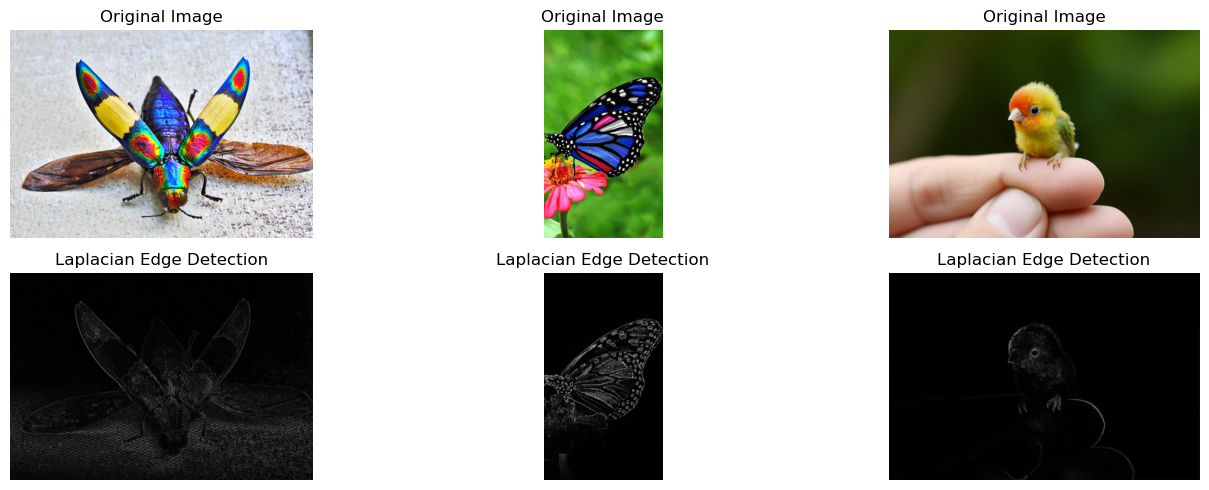

In [16]:
def display_images(original, edges):
    plt.figure(figsize=(15, 5))
    for i in range(len(original)):
        # Original image
        plt.subplot(2, len(original), i + 1)
        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Edge-detected image
        plt.subplot(2, len(original), len(original) + i + 1)
        plt.imshow(edges[i], cmap='gray')
        plt.title('Laplacian Edge Detection')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images
display_images(images, edge_images)


<h1>Frequency Domain Analysis using Fourier Transform</h1>
<p>The Fourier transform is a mathematical technique used to analyze the frequency components of signals and images.</p>

<h2>Fourier Transform Overview</h2>
<p>This transform converts a signal from the time domain into the frequency domain.</p>

<h3>Applications</h3>
<p>Frequency domain analysis is widely used in image processing for filtering and compression.</p>

<p>It helps in identifying periodic patterns and noise in images.</p>
<p>Fourier transform techniques are fundamental in various fields, including signal processing and telecommunications.</p>

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def fourier_transform(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    
    # Shift the zero-frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Calculate magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Adding 1 to avoid log(0)

    return magnitude_spectrum


In [19]:
# Load images (replace with your actual file paths)
image_paths = ['insect.jpg', 'butterfly.jpg', 'bird.jpg']
images = [cv2.imread(img_path) for img_path in image_paths]

# Prepare a list to hold the frequency domain representations
frequency_images = []

for img in images:
    freq_img = fourier_transform(img)  # Apply Fourier Transform
    frequency_images.append(freq_img)


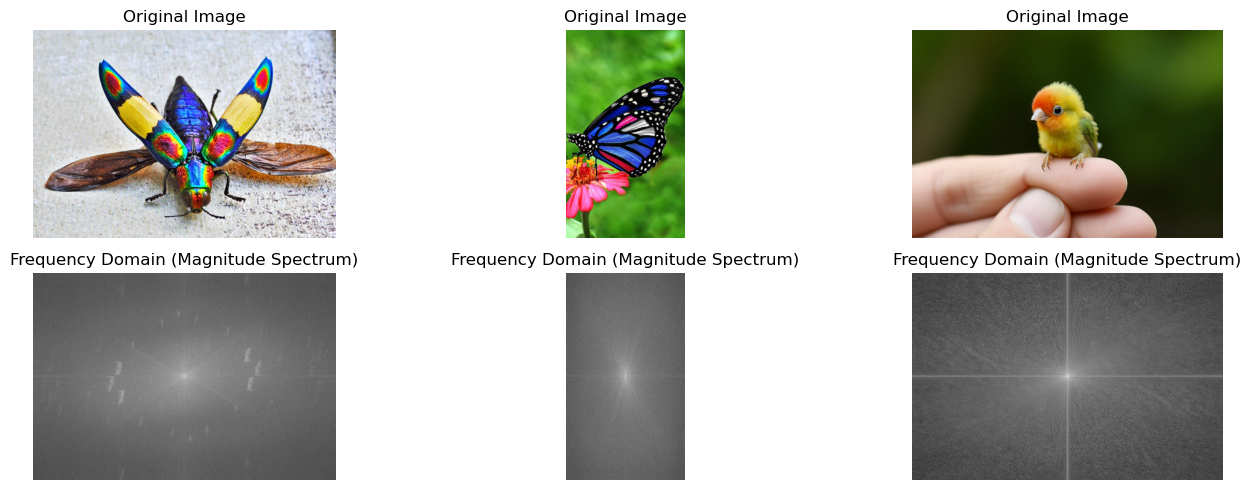

In [20]:
def display_images(original, frequency):
    plt.figure(figsize=(15, 5))
    for i in range(len(original)):
        # Original image
        plt.subplot(2, len(original), i + 1)
        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Frequency domain image
        plt.subplot(2, len(original), len(original) + i + 1)
        plt.imshow(frequency[i], cmap='gray')
        plt.title('Frequency Domain (Magnitude Spectrum)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images
display_images(images, frequency_images)


<h1>Non-Maximum Suppression for Thinning</h1>
<p>Non-maximum suppression is a technique used in image processing to refine edge detection.</p>

<h2>Overview</h2>
<p>This method aims to thin detected edges by retaining only the local maxima.</p>

<h3>Applications</h3>
<p>Non-maximum suppression is commonly used after gradient calculation in edge detection algorithms.</p>

<p>It helps in reducing thick edges to single-pixel-wide lines, improving edge representation.</p>
<p>This technique is essential in applications like computer vision and object detection.</p>

Number of original images: 3
Number of NMS images: 3


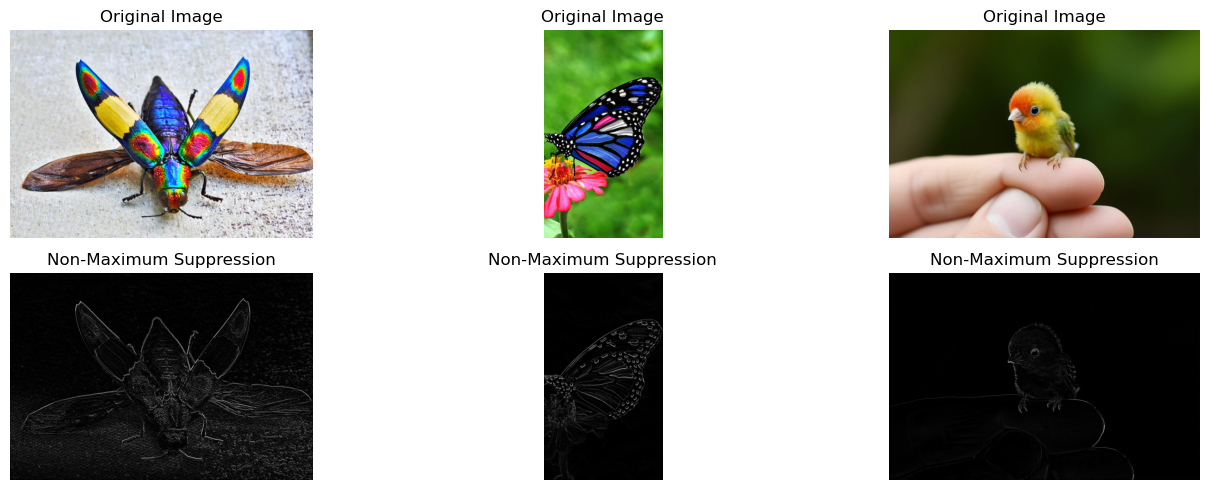

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_maximum_suppression(gradient_magnitude, gradient_direction):
    Z = np.zeros_like(gradient_magnitude)
    height, width = gradient_magnitude.shape

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            angle = gradient_direction[y, x]
            if angle < 0:
                angle += 180
            
            neighbor1, neighbor2 = 0, 0  # Initialize neighbors
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[y, x + 1]
                neighbor2 = gradient_magnitude[y, x - 1]
            elif 22.5 <= angle < 67.5:
                neighbor1 = gradient_magnitude[y + 1, x - 1]
                neighbor2 = gradient_magnitude[y - 1, x + 1]
            elif 67.5 <= angle < 112.5:
                neighbor1 = gradient_magnitude[y + 1, x]
                neighbor2 = gradient_magnitude[y - 1, x]
            elif 112.5 <= angle < 157.5:
                neighbor1 = gradient_magnitude[y - 1, x - 1]
                neighbor2 = gradient_magnitude[y + 1, x + 1]

            if gradient_magnitude[y, x] >= neighbor1 and gradient_magnitude[y, x] >= neighbor2:
                Z[y, x] = gradient_magnitude[y, x]
    
    return Z

# Load images (replace with your actual file paths)
image_paths = ['insect.jpg', 'butterfly.jpg', 'bird.jpg']
images = [cv2.imread(img_path) for img_path in image_paths]

# Check if images are loaded correctly
for i, img in enumerate(images):
    if img is None:
        print(f"Error loading image at index {i}: {image_paths[i]}")

nms_images = []

for img in images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)
    
    gradient_magnitude = cv2.magnitude(cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5),
                                       cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5))
    gradient_direction = cv2.phase(cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5),
                                   cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5), angleInDegrees=True)
    
    nms_img = non_maximum_suppression(gradient_magnitude, gradient_direction)
    nms_images.append(nms_img)

# Check lengths before displaying
print(f"Number of original images: {len(images)}")
print(f"Number of NMS images: {len(nms_images)}")

def display_images(original, nms):
    plt.figure(figsize=(15, 5))
    for i in range(len(original)):
        plt.subplot(2, len(original), i + 1)
        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(2, len(original), len(original) + i + 1)
        plt.imshow(nms[i], cmap='gray')
        plt.title('Non-Maximum Suppression')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Only display if lengths match
if len(images) == len(nms_images):
    display_images(images, nms_images)
else:
    print("Mismatch in number of images. Cannot display.")
